# EDA notebook

## Importing the Data

In [2]:
bom_raw = pd.read_csv("../data/bom.movie_gross.csv.gz")
conn = sqlite3.connect("../data/im.db/im.db")
rt_movie_info_raw = pd.read_csv("../data/rt.movie_info.tsv.gz", delimiter="\t")
rt_reviews_raw = pd.read_csv("../data/rt.reviews.tsv.gz", delimiter="\t", encoding='cp1252')
tmdb_movies_raw = pd.read_csv("../data/tmdb.movies.csv.gz", index_col=0)
tn_movie_budgets_raw = pd.read_csv("../data/tn.movie_budgets.csv.gz")

ModuleNotFoundError: No module named 'seaborn'

In [13]:
bom_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


## GENRE VS RATING

In [ ]:
# Pulling genre and ratings data from IMDB Database
genre_vs_rating=pd.read_sql('''
SELECT b.genres, r.averagerating
FROM movie_basics b
	JOIN movie_ratings r
	USING (movie_id)
GROUP BY genres;'''
, conn)
genre_vs_rating.head()

In [ ]:
# Renaming the genres column for splitting
genre_vs_gross_split = genre_vs_rating.rename(columns={'genres':'col'})
# split the values in the 'col1' column and create new columns for each split value
new_cols = genre_vs_gross_split['col'].str.split(',', expand=True)

# rename the new columns with the original column name and a number
new_cols.columns = [f'col_{i+1}' for i in range(new_cols.shape[1])]

# concatenate the original DataFrame with the new columns
df = pd.concat([genre_vs_gross_split, new_cols], axis=1)

# drop the original 'col' column
df.drop(columns=['col'], inplace=True)

# print the new DataFrame with split values
genre_vs_gross_split = df

In [ ]:
# Verifying genres have been separated
genre_vs_gross_split

,averagerating,col_1,col_2,col_3
0,6.6,None,None,None
1,6.4,Action,None,None
2,3.4,Action,Adult,Comedy
3,3.3,Action,Adventure,None
4,6.6,Action,Adventure,Animation
...,...,...,...,...
919,6.6,Thriller,None,None
920,6.1,Thriller,War,None
921,6.4,Thriller,Western,None
922,9.0,War,None,None


In [ ]:
# Splitting col_2 and col_3 from dataframe
genre_vs_gross_col_1 = genre_vs_gross_split[['averagerating','col_1']]
genre_vs_gross_col_1 = genre_vs_gross_col_1.rename(columns={'col_1':'genre'})
genre_vs_gross_col_2 = genre_vs_gross_split[['averagerating','col_2']]
genre_vs_gross_col_2 = genre_vs_gross_col_2.rename(columns={'col_2':'genre'})
genre_vs_gross_col_3 = genre_vs_gross_split[['averagerating','col_3']]
genre_vs_gross_col_3 = genre_vs_gross_col_3.rename(columns={'col_3':'genre'})

In [ ]:
# Appending each dataframe to each other
genre_vs_rating_agg = genre_vs_gross_col_1.append(other=[genre_vs_gross_col_2,genre_vs_gross_col_3],ignore_index=True)

C:\Users\James\AppData\Local\Temp\ipykernel_1552\1402068141.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre_vs_rating_agg = genre_vs_gross_col_1.append(other=[genre_vs_gross_col_2,genre_vs_gross_col_3],ignore_index=True)


In [ ]:
# Verifying the Aggregation
genre_vs_rating_agg

,averagerating,genre
0,6.6,None
1,6.4,Action
2,3.4,Action
3,3.3,Action
4,6.6,Action
...,...,...
2767,6.6,None
2768,6.1,None
2769,6.4,None
2770,9.0,None


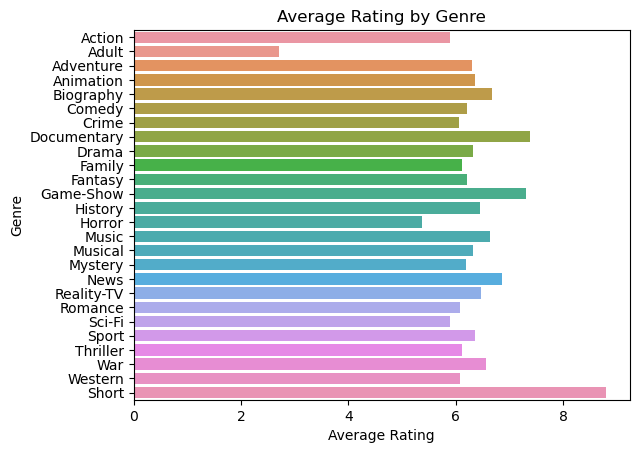

In [ ]:
# Graphing Genre vs Rating
sns.barplot(y=genre_vs_rating_agg['genre'], x=genre_vs_rating_agg['averagerating'], data=genre_vs_rating_agg,errorbar=None)
plt.title('Average Rating by Genre')
plt.ylabel('Genre')
plt.xlabel('Average Rating');

## GENRE VS GROSS

### Preparing and Merging Genre Data

#### Imdb

In [ ]:
# Building List of Imdb movies and their genres
imdb_title_genres=pd.read_sql('''
SELECT DISTINCT primary_title as title,genres as genre
FROM movie_basics
GROUP BY genres
;'''
, conn)
imdb_title_genres

,title,genre
0,How Huang Fei-hong Rescued the Orphan from the...,None
1,Aman Ke Farishtey,Action
2,Moonshine Meat Market Mayhem,"Action,Adult,Comedy"
3,Gripped: Climbing Killer Pillar,"Action,Adventure"
4,Puss in Boots,"Action,Adventure,Animation"
...,...,...
1081,The Wanderer,"Thriller,War,Western"
1082,Red Hill,"Thriller,Western"
1083,Dog Company,War
1084,"Dalibor, the Yugo Cowboy","War,Western"


In [ ]:
# Renaming the genres column for splitting
df = imdb_title_genres.rename(columns={'genre':'col'})
# split the values in the 'col1' column and create new columns for each split value
new_cols = df['col'].str.split(',', expand=True)
# rename the new columns with the original column name and a number
new_cols.columns = [f'col_{i+1}' for i in range(new_cols.shape[1])]

# concatenate the original DataFrame with the new columns
df = pd.concat([df, new_cols], axis=1)

# drop the original 'col1' column
df.drop(columns=['col'], inplace=True)

# print the new DataFrame with split values
print(df)

                                                  title     col_1      col_2  \
0     How Huang Fei-hong Rescued the Orphan from the...      None       None   
1                                     Aman Ke Farishtey    Action       None   
2                          Moonshine Meat Market Mayhem    Action      Adult   
3                       Gripped: Climbing Killer Pillar    Action  Adventure   
4                                         Puss in Boots    Action  Adventure   
...                                                 ...       ...        ...   
1081                                       The Wanderer  Thriller        War   
1082                                           Red Hill  Thriller    Western   
1083                                        Dog Company       War       None   
1084                           Dalibor, the Yugo Cowboy       War    Western   
1085                                         Río de oro   Western       None   

          col_3  
0          None  
1  

In [ ]:
# Assign
genre_vs_gross_split = df 

In [ ]:
# Splitting col_2 and col_3 from dataframe
genre_vs_gross_col_1 = genre_vs_gross_split[['title','col_1']]
genre_vs_gross_col_1 = genre_vs_gross_col_1.rename(columns={'col_1':'genre'})
genre_vs_gross_col_2 = genre_vs_gross_split[['title','col_2']]
genre_vs_gross_col_2 = genre_vs_gross_col_2.rename(columns={'col_2':'genre'})
genre_vs_gross_col_3 = genre_vs_gross_split[['title','col_3']]
genre_vs_gross_col_3 = genre_vs_gross_col_3.rename(columns={'col_3':'genre'})

In [ ]:
# Appending each dataframe to each other
genre_vs_gross_agg = genre_vs_gross_col_1.append(other=[genre_vs_gross_col_2,genre_vs_gross_col_3],ignore_index=True)

C:\Users\James\AppData\Local\Temp\ipykernel_1552\4029083571.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  genre_vs_gross_agg = genre_vs_gross_col_1.append(other=[genre_vs_gross_col_2,genre_vs_gross_col_3],ignore_index=True)


In [ ]:
# Verifying the Aggregation
genre_vs_gross_agg

,title,genre
0,How Huang Fei-hong Rescued the Orphan from the...,None
1,Aman Ke Farishtey,Action
2,Moonshine Meat Market Mayhem,Action
3,Gripped: Climbing Killer Pillar,Action
4,Puss in Boots,Action
...,...,...
3253,The Wanderer,Western
3254,Red Hill,None
3255,Dog Company,None
3256,"Dalibor, the Yugo Cowboy",None


In [ ]:
imdb_genre_vs_gross_agg=genre_vs_gross_agg

In [ ]:
imdb_genre_vs_gross_agg.head()

,title,genre
0,How Huang Fei-hong Rescued the Orphan from the...,None
1,Aman Ke Farishtey,Action
2,Moonshine Meat Market Mayhem,Action
3,Gripped: Climbing Killer Pillar,Action
4,Puss in Boots,Action


#### The Movie Database

In [ ]:
tmdb_movies_raw.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [ ]:
tmdb_movies_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [ ]:
#changing release_date to datetime
tmdb_movies_raw['release_date'] = pd.to_datetime(tmdb_movies_raw['release_date'])

In [ ]:
#removing unnecessary str chars
tmdb_movies_raw['genre_ids'] = tmdb_movies_raw['genre_ids'].str.replace(' ', '')
tmdb_movies_raw['genre_ids'] = tmdb_movies_raw['genre_ids'].str.replace(']', '')
tmdb_movies_raw['genre_ids'] = tmdb_movies_raw['genre_ids'].str.replace('[', '')

C:\Users\James\AppData\Local\Temp\ipykernel_1552\1309418447.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tmdb_movies_raw['genre_ids'] = tmdb_movies_raw['genre_ids'].str.replace(']', '')
C:\Users\James\AppData\Local\Temp\ipykernel_1552\1309418447.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tmdb_movies_raw['genre_ids'] = tmdb_movies_raw['genre_ids'].str.replace('[', '')


In [ ]:
tmdb_movies_raw.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"12,14,10751",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"14,12,16,10751",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"12,28,878",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"16,35,10751",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"28,878,12",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [ ]:
#making a dict to convert id to actual string
tmdb_genre_dict = {
    "28":"Action",
    "12":"Adventure",
    "16":"Animation",
    "35":"Comedy",
    "80":"Crime",
    "99":"Documentary",
    "18":"Drama",
    "10751":"Family",
    "14":"Fantasy",
    "36":"History",
    "27":"Horror",
    "10402":"Music",
    "9648":"Mystery",
    "878":"Science Fiction",
    "10770":"TV Movie",
    "53":"Thriller",
    "10752":"War",
    "37":"Western"
}

In [ ]:
#changing ids to genre
for ind in tmdb_movies_raw.index:
    for key, value in tmdb_genre_dict.items():
        tmdb_movies_raw['genre_ids'][ind] = tmdb_movies_raw['genre_ids'][ind].replace(key, value)

### Preparing Financial Data

#### Box Office Mojo

In [ ]:
bom_raw.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
#dropping nulls and studio column
bom_raw['domestic_gross']=bom_raw['domestic_gross'].astype(float)
bom_raw['foreign_gross'] = bom_raw['foreign_gross'].str.replace(',','')
bom_raw['foreign_gross']=bom_raw['foreign_gross'].astype(float)
bom_raw.dropna(inplace=True)
bom_raw.drop('studio', axis=1,inplace=True)


In [ ]:
bom_raw.head()

,title,domestic_gross,foreign_gross,year
0,Toy Story 3,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010
3,Inception,292600000.0,535700000.0,2010
4,Shrek Forever After,238700000.0,513900000.0,2010


In [ ]:
bom_raw['worldwide_gross'] = bom_raw['domestic_gross'] + bom_raw['foreign_gross']

In [ ]:
bom_raw.head()

,title,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,238700000.0,513900000.0,2010,7.526000e+08


In [ ]:
bom_cleaned = bom_raw

In [ ]:
bom_cleaned.head()

,title,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,238700000.0,513900000.0,2010,7.526000e+08


In [ ]:
bom_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            2007 non-null   object 
 1   domestic_gross   2007 non-null   float64
 2   foreign_gross    2007 non-null   float64
 3   year             2007 non-null   int64  
 4   worldwide_gross  2007 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 94.1+ KB


#### The Numbers Dataset

In [ ]:
tn_movie_budgets_raw.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [ ]:
tn_movie_budgets_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [ ]:
# change 'movie' column to 'title'
tn_movie_budgets_raw.rename(columns={'movie':'title'},inplace=True)


In [ ]:
# drops id column
tn_movie_budgets_raw.drop('id', axis=1)

,release_date,title,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
5777,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [ ]:
# change release_date to datetime
tn_movie_budgets_raw['release_date'] = pd.to_datetime(tn_movie_budgets_raw['release_date'])
# taking out $ and , in numbers
tn_movie_budgets_raw['production_budget'] = tn_movie_budgets_raw['production_budget'].str.replace('$', '').str.replace(',', '')
tn_movie_budgets_raw['domestic_gross'] = tn_movie_budgets_raw['domestic_gross'].str.replace('$', '').str.replace(',', '')
tn_movie_budgets_raw['worldwide_gross'] = tn_movie_budgets_raw['worldwide_gross'].str.replace('$', '').str.replace(',', '')
# casting production_budget as integer
tn_movie_budgets_raw['production_budget'] = tn_movie_budgets_raw['production_budget'].astype(float)
tn_movie_budgets_raw['domestic_gross'] = tn_movie_budgets_raw['domestic_gross'].astype(float)
tn_movie_budgets_raw['worldwide_gross'] = tn_movie_budgets_raw['worldwide_gross'].astype(float)
# creating new df called clean for consistency
tn_movie_budgets_cleaned = tn_movie_budgets_raw


C:\Users\James\AppData\Local\Temp\ipykernel_1552\3634902062.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_movie_budgets_raw['production_budget'] = tn_movie_budgets_raw['production_budget'].str.replace('$', '').str.replace(',', '')
C:\Users\James\AppData\Local\Temp\ipykernel_1552\3634902062.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  tn_movie_budgets_raw['domestic_gross'] = tn_movie_budgets_raw['domestic_gross'].str.replace('$', '').str.replace(',', '')
C:\Users\James\AppData\Local\Temp\ipykernel_1552\3634902062.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions 

In [ ]:
tn_movie_budgets_cleaned = tn_movie_budgets_raw

In [ ]:
tn_movie_budgets_cleaned.drop('id',axis=1,inplace=True)

In [ ]:
tn_movie_budgets_cleaned.head()

,release_date,title,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09


In [ ]:
tn_movie_budgets_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   title              5782 non-null   object        
 2   production_budget  5782 non-null   float64       
 3   domestic_gross     5782 non-null   float64       
 4   worldwide_gross    5782 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 226.0+ KB


In [ ]:
merge_financials = tn_movie_budgets_cleaned.merge(bom_cleaned,how='inner',on='title')

In [ ]:
merge_financials

,release_date,title,production_budget,domestic_gross_x,worldwide_gross,domestic_gross_y,foreign_gross,year
0,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,241100000.0,804600000.0,2011
1,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,459000000.0,946400000.0,2015
2,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09,678800000.0,1369.5,2018
3,2017-11-17,Justice League,300000000.0,229024295.0,6.559452e+08,229000000.0,428900000.0,2017
4,2015-11-06,Spectre,300000000.0,200074175.0,8.796209e+08,200100000.0,680600000.0,2015
...,...,...,...,...,...,...,...,...
1078,2010-10-29,Monsters,500000.0,237301.0,5.639730e+06,237000.0,4000000.0,2010
1079,2001-07-27,Jackpot,400000.0,44452.0,4.445200e+04,800.0,1100000.0,2014
1080,2011-10-28,Like Crazy,250000.0,3395391.0,3.728400e+06,3400000.0,336000.0,2011
1081,2011-07-22,Another Earth,175000.0,1321194.0,2.102779e+06,1300000.0,456000.0,2011


In [ ]:
genres_financials_merged = imdb_genre_vs_gross_agg.merge(bom_cleaned,how='inner',on='title')

In [ ]:
genres_financials_merged.head()

,title,genre,domestic_gross,foreign_gross,year,worldwide_gross
0,Puss in Boots,Action,149300000.0,405700000.0,2011,555000000.0
1,Puss in Boots,Adventure,149300000.0,405700000.0,2011,555000000.0
2,Puss in Boots,Animation,149300000.0,405700000.0,2011,555000000.0
3,In the Heart of the Sea,Action,25000000.0,68900000.0,2015,93900000.0
4,In the Heart of the Sea,Adventure,25000000.0,68900000.0,2015,93900000.0


In [ ]:
genres_financials_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195 entries, 0 to 194
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            195 non-null    object 
 1   genre            191 non-null    object 
 2   domestic_gross   195 non-null    float64
 3   foreign_gross    195 non-null    float64
 4   year             195 non-null    int64  
 5   worldwide_gross  195 non-null    float64
dtypes: float64(3), int64(1), object(2)
memory usage: 10.7+ KB


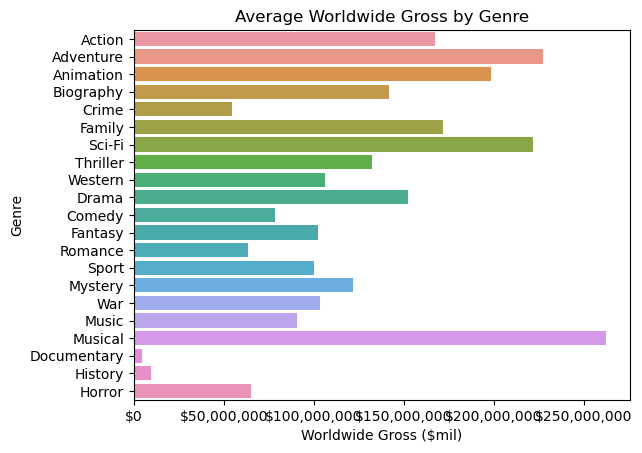

In [ ]:
sns.barplot(y = genres_financials_merged['genre'], 
            x = genres_financials_merged['worldwide_gross'], 
            data = genres_financials_merged, 
            errorbar = None)
plt.title('Average Worldwide Gross by Genre')
plt.ylabel('Genre')
plt.xlabel('Worldwide Gross ($mil)')
plt.ticklabel_format(style='plain', axis='x')
# create a formatter for x-axis ticks with commas and dollar signs
formatter = ticker.StrMethodFormatter('${x:,.0f}')

# apply the formatter to the x-axis ticks
plt.gca().xaxis.set_major_formatter(formatter)

# show the plot
plt.show()

***Sanity Check***
- Does this outcome make sense?
- Looking at The Numbers Database's top grossing movies reveals:

In [ ]:
tn_movie_budgets_cleaned.sort_values('worldwide_gross',ascending=False).head(20)

,release_date,title,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09
42,1997-12-19,Titanic,200000000.0,659363944.0,2.208208e+09
5,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000.0,936662225.0,2.053311e+09
6,2018-04-27,Avengers: Infinity War,300000000.0,678815482.0,2.048134e+09
33,2015-06-12,Jurassic World,215000000.0,652270625.0,1.648855e+09
66,2015-04-03,Furious 7,190000000.0,353007020.0,1.518723e+09
26,2012-05-04,The Avengers,225000000.0,623279547.0,1.517936e+09
3,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
41,2018-02-16,Black Panther,200000000.0,700059566.0,1.348258e+09
260,2011-07-15,Harry Potter and the Deathly Hallows: Part II,125000000.0,381193157.0,1.341693e+09


## BUDGET VS GROSS

In [ ]:
imdb_basics

,Unnamed: 0,movie_id,primary_title,start_year,runtime_minutes,genres,title_merge_x,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_merge_y
0,0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",sunghursh,NaN,NaN,NaN,NaN,NaN,NaN
1,1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",onedaybeforetherainyseason,NaN,NaN,NaN,NaN,NaN,NaN
2,2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,theothersideofthewind,NaN,NaN,NaN,NaN,NaN,NaN
3,3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",sabsebadasukh,NaN,NaN,NaN,NaN,NaN,NaN
4,4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",thewanderingsoapopera,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147924,147924,tt9916538,Kuambil Lagi Hatiku,2019,123.0,Drama,kuambillagihatiku,NaN,NaN,NaN,NaN,NaN,NaN
147925,147925,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,rodolphoteóphiloolegadodeumpioneiro,NaN,NaN,NaN,NaN,NaN,NaN
147926,147926,tt9916706,Dankyavar Danka,2013,NaN,Comedy,dankyavardanka,NaN,NaN,NaN,NaN,NaN,NaN
147927,147927,tt9916730,6 Gunn,2017,116.0,NaN,6gunn,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
imdb_basics.drop('title_merge_x', axis = 1, inplace = True)

In [ ]:
#making new table from imdb basics of only ones with a production budget
budget_vs_gross_df = imdb_basics[(imdb_basics['production_budget']!= 0) & (imdb_basics['production_budget'].notnull() == True)]

In [ ]:
#making a net loss/gain col
budget_vs_gross_df['budget_vs_gross'] = budget_vs_gross_df['worldwide_gross'] - budget_vs_gross_df['production_budget']

<ipython-input-9-31a355427558>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budget_vs_gross_df['budget_vs_gross'] = budget_vs_gross_df['worldwide_gross'] - budget_vs_gross_df['production_budget']


In [ ]:
budget_vs_gross_df

,Unnamed: 0,movie_id,primary_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_merge_y,budget_vs_gross
20,20,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",2012-12-31 00:00:00,Foodfight!,45000000.0,0.0,73706.0,foodfight!,-44926294.0
33,33,tt0293429,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",1995-08-18 00:00:00,Mortal Kombat,20000000.0,70433227.0,122133227.0,mortalkombat,102133227.0
40,40,tt0326592,The Overnight,2010,88.0,NaN,2015-06-19 00:00:00,The Overnight,200000.0,1109808.0,1165996.0,theovernight,965996.0
49,49,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",2013-03-22 00:00:00,On the Road,25000000.0,720828.0,9313302.0,ontheroad,-15686698.0
56,56,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",2013-12-25 00:00:00,The Secret Life of Walter Mitty,91000000.0,58236838.0,187861183.0,thesecretlifeofwaltermitty,96861183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147627,147627,tt9877596,Trapped,2016,NaN,NaN,2002-09-20 00:00:00,Trapped,30000000.0,6916869.0,6916869.0,trapped,-23083131.0
147721,147721,tt9889072,The Promise,2017,NaN,Drama,2017-04-21 00:00:00,The Promise,90000000.0,8224288.0,10551417.0,thepromise,-79448583.0
147770,147770,tt9893078,Sublime,2019,NaN,Documentary,2007-03-13 00:00:00,Sublime,1800000.0,0.0,0.0,sublime,-1800000.0
147809,147809,tt9899880,Columbus,2018,85.0,Comedy,2017-08-04 00:00:00,Columbus,700000.0,1017107.0,1110511.0,columbus,410511.0


In [ ]:
prod_median = budget_vs_gross_df['production_budget'].median()
prod_median

16000000.0

In [ ]:
prod_std = budget_vs_gross_df['production_budget'].std()
prod_std
prod_mean = budget_vs_gross_df['production_budget'].mean()
prod_mean

32608184.522411533

In [ ]:
high_end = prod_std + prod_mean
high_end

77567348.58457226

In [ ]:
low_end = prod_mean-prod_std
low_end
#unusable, maybe use median as low end?

-12350979.539749198

Copied from below
- mean is 32m
- std is 45m
- going below yeilds negative production budget. makes no sense
- median is 16m. half of mean.
- maybe use 16m as low end
- use mean + 1 std as high end?
    - not sure if statisically this is a correct thing to do

F:\Anaconda\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


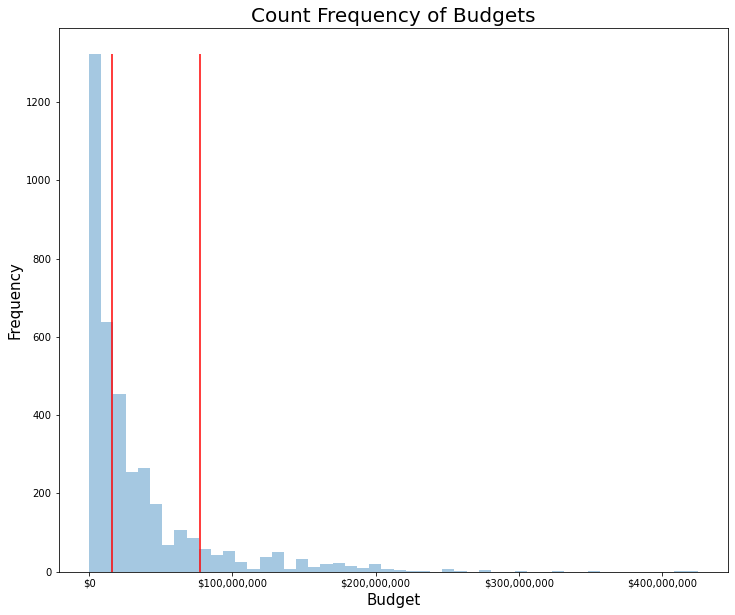

In [ ]:
#making a bar chart to check for skewedness
fig, ax = plt.subplots(figsize=(12,10))

sns.distplot(x = budget_vs_gross_df['production_budget'], hist=True, kde=False, rug=False)
ax.set_title('Count Frequency of Budgets', size = 20)
ax.set_xlabel('Budget', size = 15)
ax.set_ylabel('Frequency', size = 15)

#theoretically where mid, low, and high end budgets would fall
#reasoning for using these metrics above
ax.vlines(x = high_end, ymin = 0, ymax = 1321,
         color = 'red')

ax.vlines(x = prod_median, ymin = 0, ymax = 1321,
         color = 'red')


ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
#ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

Yup, this is skewed lol

In [ ]:
high_budget_success = budget_vs_gross_df[(budget_vs_gross_df['budget_vs_gross'] > 0) & 
                                 (budget_vs_gross_df['production_budget'] > high_end)]
high_budget_failure = budget_vs_gross_df[(budget_vs_gross_df['budget_vs_gross'] < 0) & 
                                 (budget_vs_gross_df['production_budget'] > high_end)]

#above 77.5m, high end. done by using 1std away (i know not normal, attemped clt below but dont have the confidence to use in case it was done incorrectly)


mid_budget_success = budget_vs_gross_df[(budget_vs_gross_df['budget_vs_gross'] > 0) & 
                                 (budget_vs_gross_df['production_budget'] <= high_end) &
                                         (budget_vs_gross_df['production_budget']>prod_median)]
mid_budget_failure = budget_vs_gross_df[(budget_vs_gross_df['budget_vs_gross'] < 0) & 
                                 (budget_vs_gross_df['production_budget'] <= high_end) &
                                         (budget_vs_gross_df['production_budget']>prod_median)]

#between 77.5m and 16m. low end determined by median, middle amount of films.

low_budget_success = budget_vs_gross_df[(budget_vs_gross_df['budget_vs_gross'] > 0) & 
                                 (budget_vs_gross_df['production_budget'] <= prod_median)]
low_budget_failure = budget_vs_gross_df[(budget_vs_gross_df['budget_vs_gross'] < 0) & 
                                 (budget_vs_gross_df['production_budget'] <= prod_median)]

In [ ]:
high_success = len(high_budget_success)
high_failure = len(high_budget_failure)
mid_success = len(mid_budget_success)
mid_failure = len(mid_budget_failure)
low_success = len(low_budget_success)
low_failure = len(low_budget_failure)
print(low_failure)


1006


In [ ]:
percent_high_failure = high_failure / (high_failure + high_success) * 100
percent_mid_failure = mid_failure / (mid_failure + mid_success) * 100
percent_low_failure = low_failure / (low_failure + low_success) * 100

In [ ]:
print(f"Percentage of high budget films who profited: {(100 - percent_high_failure):.2f}")
print(f"Percentage of middle budget films who profited: {(100 - percent_mid_failure):.2f}")
print(f"Percentage of low budget films who profited: {(100 - percent_low_failure):.2f}")
print(f"********************************************************")

print(f"Amount of high budget films from total population: {high_success + high_failure:.0f}")
print(f"Amount of middle budget films from total population: {mid_success + mid_failure:.0f}")
print(f"Amount of low budget films from total population: {low_failure + low_success:.0f}")

Percentage of high budget films who profited: 88.58
Percentage of middle budget films who profited: 65.07
Percentage of low budget films who profited: 47.98
********************************************************
Amount of high budget films from total population: 438
Amount of middle budget films from total population: 1443
Amount of low budget films from total population: 1934


As suspected, data is skewed, but it may reflect real life standards. Makes more sense more low budget films are made than middle, and so on with high end budget

In [ ]:
percent_high_failure

11.415525114155251

In [ ]:
percent_mid_failure

34.92723492723493

In [ ]:
percent_low_failure

52.01654601861427

Below is an attempt at CLT

In [ ]:
#make a list from prod budget to get means
budget_list = budget_vs_gross_df['production_budget']
budget_list = budget_list.reset_index()

budget_list.drop(['index'], axis = 1, inplace = True)


In [ ]:
number = float(budget_list.iloc[900])
number
#testing if locating by ind works


75000000.0

In [ ]:
len(budget_vs_gross_df.index)

3815

I believe the below is CLT, sample size of 300, 700 sample plots? Did not use these metrics because I was not sure if this was done correctly

In [ ]:
#mean points to plot
sample_mean_list = []
#gathering sample to get mean of
mean_in_loop = []


max_sample = 300

max_random = len(budget_vs_gross_df.index)

popu = 700

#Want x(700) samples to graph
for i in range(0,1 + popu):
#get mean of sample (300) random selections
    for j in range(0,max_sample + 1):
        #pick random index of sample
        random_pick = (np.random.randint(1,max_random) - 1)
        #append chosen production budget to mean_in_loop
        mean_in_loop.append(float(budget_list.iloc[random_pick]))
        #iterate loop
        j += 1
    #get mean of mean_in_loop, append to sample_mean_list to graph
    sample_mean_list.append(np.average(mean_in_loop))
    i += 1
    mean_in_loop = []
    #reset mean_in_loop to empty



F:\Anaconda\envs\learn-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


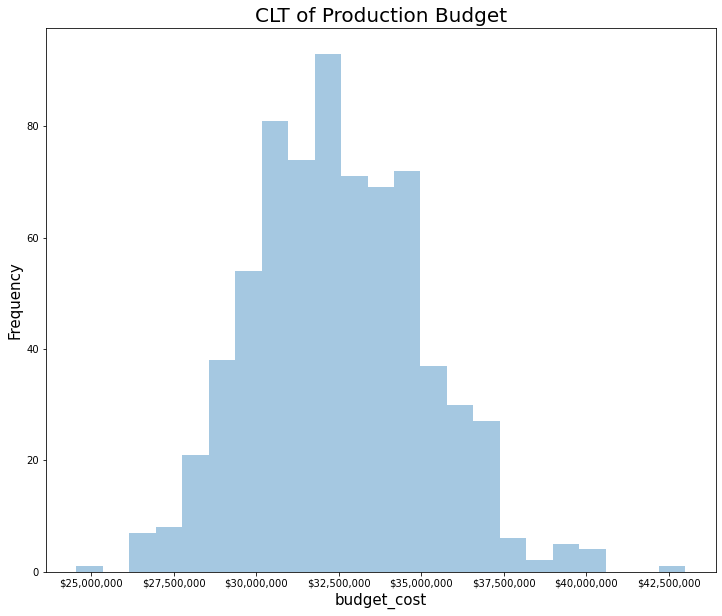

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))

sns.distplot(x = sample_mean_list, hist=True, kde=False, rug=False)
ax.set_title('CLT of Production Budget', size = 20)
ax.set_xlabel('budget_cost', size = 15)
ax.set_ylabel('Frequency', size = 15)
ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
#ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

In [ ]:
average = sum(sample_mean_list)/len(sample_mean_list)
average

32503853.847550478

In [ ]:
stand = stat.stdev(sample_mean_list)
stand

2589298.8821432856

In [ ]:
average + 3*stand

40271750.49398033

 ??? This is supposed to mean 3 std away, 97.5% of data is below  $40,271,750??

In [ ]:
lol_no_shot = average + 3*stand

In [ ]:
nah = budget_vs_gross_df[budget_vs_gross_df['production_budget'] > lol_no_shot]
print(len(budget_vs_gross_df))
print(len(nah))

3815
902


After a quick check, this CLT was coded incorrectly or not being used correctly.

If you run again and get to this point with different numbers, its because the CLT function ran again and got a new sample pool to look at. But results were consistently close with multiple runs

Ignoring CLT metrics, using metrics above CLT, below is graph sectioned off by budget tier using metrics above CLT attempt.

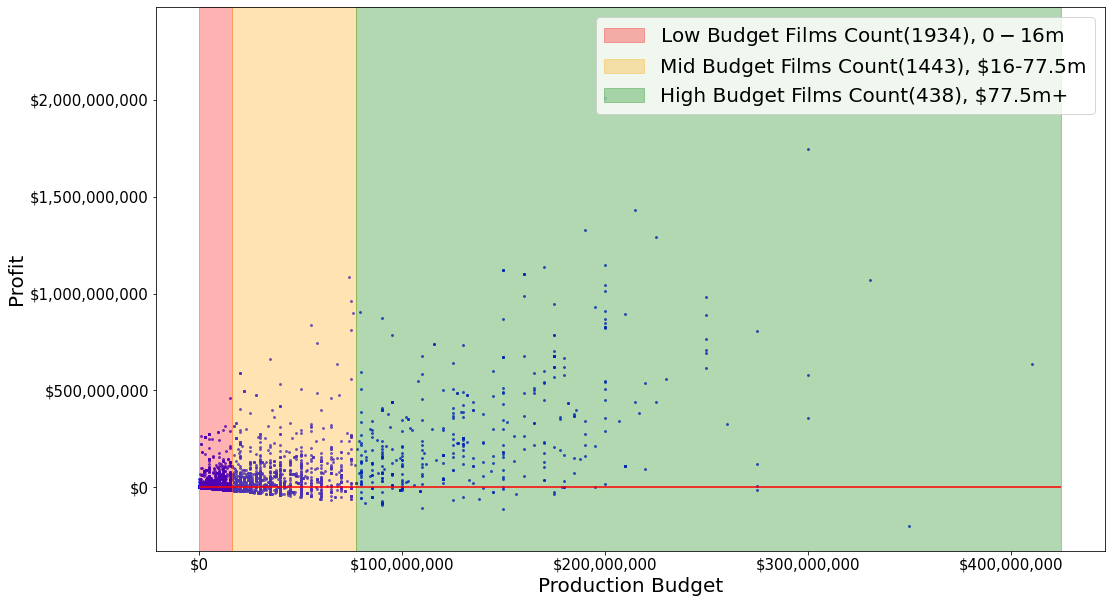

In [ ]:
fig, ax = plt.subplots(figsize=(17,10))
sns.regplot(x = budget_vs_gross_df['production_budget'], y = budget_vs_gross_df['budget_vs_gross'], marker = '.', 
            scatter_kws={"color":"blue","alpha":0.7,"s":15}, fit_reg = False)

#ax.set_title('Production Budget vs Profit', size = 20)
ax.set_xlabel('Production Budget', size = 20)
ax.set_ylabel('Profit', size = 20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#ax.vlines(x = high_end, ymin = budget_vs_gross_df['budget_vs_gross'].min(), ymax = budget_vs_gross_df['budget_vs_gross'].max(),
#         color = 'red')

#ax.vlines(x = prod_median, ymin = budget_vs_gross_df['budget_vs_gross'].min(), ymax = budget_vs_gross_df['budget_vs_gross'].max(),
#         color = 'red')


ax.axvspan(0, prod_median, alpha=0.3, color='red')

ax.axvspan(prod_median, high_end, alpha=0.3, color='orange')

ax.axvspan(high_end, budget_vs_gross_df['production_budget'].max(), alpha=0.3, color='green')

legend_drawn_flag = True

plt.legend(["Low Budget Films Count(1934), $0 - $16m", "Mid Budget Films Count(1443), $16-77.5m", "High Budget Films Count(438), $77.5m+"], loc = "upper right", fontsize= 20)





ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.hlines(y = 0, xmin = budget_vs_gross_df['production_budget'].min(), xmax = budget_vs_gross_df['production_budget'].max(),
         color = 'red')
plt.savefig('budget_profit.png')

Below was for checking out graph without outliers

In [ ]:
net_positive = budget_vs_gross_df[budget_vs_gross_df['budget_vs_gross'] > 0]
net_negative = budget_vs_gross_df[budget_vs_gross_df['budget_vs_gross'] < 0]

In [ ]:
chance_of_loss = len(net_negative)/len(budget_vs_gross_df) * 100
chance_of_loss

40.89121887287025

In [ ]:
production_mean = budget_vs_gross_df['production_budget'].mean()
production_mean

32608184.522411533

In [ ]:
production_std = budget_vs_gross_df['production_budget'].std()
production_std

44959164.06216073

- will take values 2 std away from mean (from 0 - 95% of data)

In [ ]:
production_max = production_mean + (2*production_std)
production_max

122526512.64673299

In [ ]:
std2_away = budget_vs_gross_df[budget_vs_gross_df['production_budget'] < production_max]
std2_away

,Unnamed: 0,movie_id,primary_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_merge_y,budget_vs_gross
20,20,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",2012-12-31 00:00:00,Foodfight!,45000000.0,0.0,73706.0,foodfight!,-44926294.0
33,33,tt0293429,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",1995-08-18 00:00:00,Mortal Kombat,20000000.0,70433227.0,122133227.0,mortalkombat,102133227.0
40,40,tt0326592,The Overnight,2010,88.0,NaN,2015-06-19 00:00:00,The Overnight,200000.0,1109808.0,1165996.0,theovernight,965996.0
49,49,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",2013-03-22 00:00:00,On the Road,25000000.0,720828.0,9313302.0,ontheroad,-15686698.0
56,56,tt0359950,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",2013-12-25 00:00:00,The Secret Life of Walter Mitty,91000000.0,58236838.0,187861183.0,thesecretlifeofwaltermitty,96861183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147627,147627,tt9877596,Trapped,2016,NaN,NaN,2002-09-20 00:00:00,Trapped,30000000.0,6916869.0,6916869.0,trapped,-23083131.0
147721,147721,tt9889072,The Promise,2017,NaN,Drama,2017-04-21 00:00:00,The Promise,90000000.0,8224288.0,10551417.0,thepromise,-79448583.0
147770,147770,tt9893078,Sublime,2019,NaN,Documentary,2007-03-13 00:00:00,Sublime,1800000.0,0.0,0.0,sublime,-1800000.0
147809,147809,tt9899880,Columbus,2018,85.0,Comedy,2017-08-04 00:00:00,Columbus,700000.0,1017107.0,1110511.0,columbus,410511.0


In [ ]:
std2_away_above = budget_vs_gross_df[budget_vs_gross_df['production_budget'] > production_max]

In [ ]:
std2_away_above

,Unnamed: 0,movie_id,primary_title,start_year,runtime_minutes,genres,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_merge_y,budget_vs_gross
64,64,tt0369610,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",2015-06-12 00:00:00,Jurassic World,215000000.0,652270625.0,1.648855e+09,jurassicworld,1.433855e+09
78,78,tt0398286,Tangled,2010,100.0,"Adventure,Animation,Comedy",2010-11-24 00:00:00,Tangled,260000000.0,200821936.0,5.864772e+08,tangled,3.264772e+08
81,81,tt0401729,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",2012-03-09 00:00:00,John Carter,275000000.0,73058679.0,2.827781e+08,johncarter,7.778100e+06
118,118,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",2010-06-18 00:00:00,Toy Story 3,200000000.0,415004880.0,1.068880e+09,toystory3,8.688795e+08
121,121,tt0437086,Alita: Battle Angel,2019,122.0,"Action,Adventure,Sci-Fi",2019-02-14 00:00:00,Alita: Battle Angel,170000000.0,85710210.0,4.029760e+08,alitabattleangel,2.329760e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
141066,141066,tt9001554,Dinosaur,2018,5.0,"Animation,Documentary,Family",2000-05-19 00:00:00,Dinosaur,127500000.0,137748063.0,3.561481e+08,dinosaur,2.286481e+08
142753,142753,tt9173998,Beauty and the Beast,2018,60.0,"Family,Fantasy,Musical",2017-03-17 00:00:00,Beauty and the Beast,160000000.0,504014165.0,1.259200e+09,beautyandthebeast,1.099200e+09
143544,143544,tt9281490,Home,2018,50.0,Documentary,2015-03-27 00:00:00,Home,130000000.0,177397510.0,3.859979e+08,home,2.559979e+08
146470,146470,tt9698912,Aladdin,2017,NaN,Fantasy,2019-05-24 00:00:00,Aladdin,182000000.0,246734314.0,6.192343e+08,aladdin,4.372343e+08


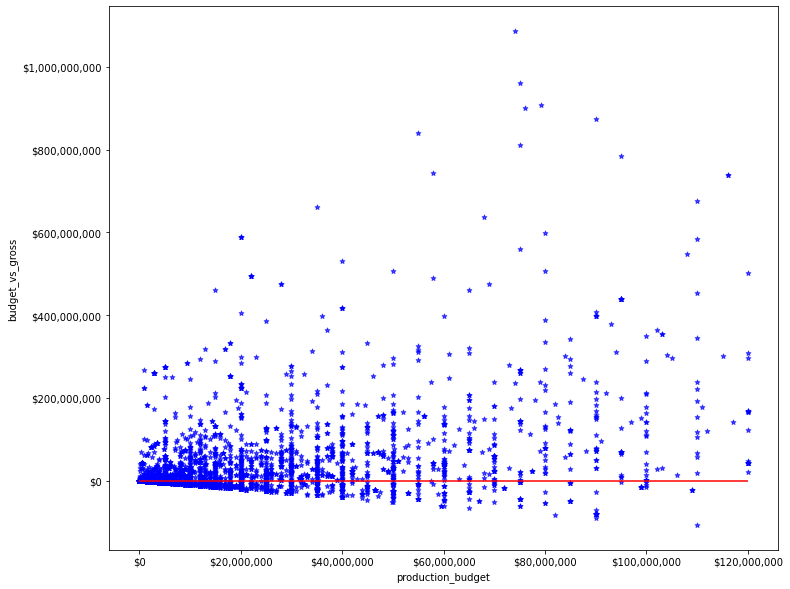

In [ ]:
#redoing plot to remove outliers
fig, ax = plt.subplots(figsize=(12,10))
sns.regplot(x = std2_away['production_budget'], y = std2_away['budget_vs_gross'], marker = '*', 
            scatter_kws={"color":"blue","alpha":0.7,"s":25}, fit_reg = False)
ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))
ax.hlines(y = 0, xmin = std2_away['production_budget'].min(), xmax = std2_away['production_budget'].max(),
         color = 'red')

- LEGACY CONCLUSION, USING LOGIC ABOVE IN PRESENTATION
- I think the only conclusion with the chance of loss is
   - if you spend less than 123,000, you have a 43% are unprofitable
   - if you spend more, the profitable are now about 40%
- this conclusion is pretty weak imo. But separating into 2 dfs of net loss and net gain may help in the next EDA's
- Will continue with the net_pos/net_neg withouth the 2std calculation (this was a lie, but a thought initially)

## WRITER VS GROSS

This metric was abandoned because of low belief in accuracy and time constraints

In [ ]:
q0 = """
SELECT DISTINCT *
FROM movie_basics
;
"""
imdb_basics_true = pd.read_sql(q0, conn)

In [ ]:
q0 = """
SELECT DISTINCT *
FROM writers
;
"""
writer_df = pd.read_sql(q0, conn)

In [ ]:
q1 = """
SELECT DISTINCT person_id, primary_name, death_year
FROM persons
;
"""
person_df = pd.read_sql(q1, conn)

In [ ]:
writer_df = writer_df.merge(
    person_df, 
    left_on='person_id',
    right_on = 'person_id',
    how = 'left')

In [ ]:
writer_df.duplicated().value_counts()

False    178352
dtype: int64

In [ ]:
#####

In [ ]:
q3 = """
SELECT DISTINCT movie_id, region, types
FROM movie_akas
;
"""
movie_akas_df = pd.read_sql(q3, conn)

In [ ]:
movie_akas_df

,movie_id,region,types
0,tt0369610,BG,None
1,tt0369610,JP,imdbDisplay
2,tt0369610,BR,imdbDisplay
3,tt0369610,BR,None
4,tt0369610,FR,imdbDisplay
...,...,...,...
322199,tt9827784,None,original
322200,tt9827784,XWW,imdbDisplay
322201,tt9880178,None,original
322202,tt9880178,ES,None


In [ ]:
imdb_basics_true = imdb_basics_true.merge(
    movie_akas_df, 
    left_on='movie_id',
    right_on = 'movie_id',
    how = 'left')
#adding akas to movie_basics

In [ ]:
imdb_basics_true = imdb_basics_true[(imdb_basics_true['region'] == 'US')]
#Want only US based movies

In [ ]:
imdb_basics_true

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,region,types
11,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,US,imdbDisplay
26,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",US,None
46,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,US,None
57,tt0192528,Heaven & Hell,Reverse Heaven,2018,104.0,Drama,US,imdbDisplay
59,tt0230212,The Final Journey,The Final Journey,2010,120.0,Drama,US,None
...,...,...,...,...,...,...,...,...
345307,tt9837530,Monkey King Reloaded,Monkey King Reloaded,2017,77.0,Adventure,US,None
345405,tt9845398,End of the Century,Fin de siglo,2019,84.0,Drama,US,imdbDisplay
345662,tt9875852,The House Elf,Domovoy,2019,90.0,"Comedy,Family,Fantasy",US,imdbDisplay
345740,tt9882084,Chasing Happiness,Chasing Happiness,2019,96.0,Documentary,US,imdbDisplay


In [ ]:
imdb_basics_true['title_merge'] = imdb_basics_true['primary_title'].apply(str.lower)

imdb_basics_true['title_merge'] = imdb_basics_true['title_merge'].str.replace(':', '')
imdb_basics_true['title_merge'] = imdb_basics_true['title_merge'].str.replace(' ', '')
imdb_basics_true['title_merge'] = imdb_basics_true['title_merge'].str.replace(',', '')
imdb_basics_true['title_merge'] = imdb_basics_true['title_merge'].str.replace('-', '')
imdb_basics_true['title_merge'] = imdb_basics_true['title_merge'].str.replace('.', '')
imdb_basics_true['title_merge'] = imdb_basics_true['title_merge'].str.replace('partiii', 'part3')
imdb_basics_true['title_merge'] = imdb_basics_true['title_merge'].str.replace('partii', 'part2')
imdb_basics_true['title_merge'] = imdb_basics_true['title_merge'].str.replace('parti', 'part1')

In [ ]:
imdb_basics_merged = imdb_basics_true.merge(
    merged_financials, 
    left_on='title_merge',
    right_on = 'title_merge',
    how = 'left')
#merge financials and imdb

In [ ]:
imdb_basics_merged = imdb_basics_merged[(imdb_basics_merged['production_budget']!= 0) & (imdb_basics_merged['production_budget'].notnull() == True)]
#dont want null prod_budget, if null then there is no info on finances. Also 0 prod budget means we got no info on it

In [ ]:
imdb_basics_merged.duplicated().value_counts()

False    2857
dtype: int64

In [ ]:
imdb_basics_merged_writer = writer_df.merge(
    imdb_basics_merged,
    left_on = 'movie_id',
    right_on = 'movie_id',
    how = 'left')

In [ ]:
imdb_basics_merged_writer.duplicated().value_counts()

False    179995
dtype: int64

In [ ]:
imdb_basics_merged_writer = imdb_basics_merged_writer[
    (imdb_basics_merged_writer['production_budget'] !=0) &
    (imdb_basics_merged_writer['production_budget'].notnull() == True)]

In [ ]:
imdb_basics_merged_writer['net_profit'] = imdb_basics_merged_writer['worldwide_gross'] - imdb_basics_merged_writer['production_budget']

In [ ]:
mean_writer_profit = imdb_basics_merged_writer.groupby('primary_name').mean().sort_values(by = 'net_profit', ascending = False)

In [ ]:
imdb_basics_merged_writer.groupby('primary_name').count().sort_values(by = 'movie_id', ascending = False)
#this is just testing if i didnt mess up the amount of writers

,movie_id,person_id,death_year,primary_title,original_title,start_year,runtime_minutes,genres,region,types,title_merge,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_profit
primary_name,,,,,,,,,,,,,,,,,,
Jack Kirby,39,39,39,39,39,39,39,39,39,20,39,39,39,39,39,39,39,39
Stan Lee,36,36,36,36,36,36,36,36,36,17,36,36,36,36,36,36,36,36
Nicholas Stoller,15,15,0,15,15,15,15,15,15,6,15,15,15,15,15,15,15,15
Larry Lieber,14,14,0,14,14,14,14,14,14,6,14,14,14,14,14,14,14,14
Eric Heisserer,13,13,0,13,13,13,13,13,13,9,13,13,13,13,13,13,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
James Thurber,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Jamie Buckner,1,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
Jamie Grefe,1,1,0,1,1,1,0,1,1,0,1,1,1,1,1,1,1,1


In [ ]:
mean_writer_profit = mean_writer_profit[mean_writer_profit['death_year'].isnull()]
#dont want the dead

In [ ]:
mean_writer_tograph = mean_writer_profit.head(10)

In [ ]:
mean_writer_tograph

,death_year,start_year,runtime_minutes,Unnamed: 0,production_budget,domestic_gross,worldwide_gross,net_profit
primary_name,,,,,,,,
Colin Trevorrow,NaN,2016.000000,125.333333,3446.333333,2.000000e+08,5.740870e+08,1.534494e+09,1.334494e+09
Joe Robert Cole,NaN,2018.000000,134.000000,3428.000000,2.000000e+08,7.000596e+08,1.348258e+09,1.148258e+09
Adam Green,NaN,2010.000000,93.000000,3542.000000,1.500000e+08,4.007380e+08,1.272470e+09,1.122470e+09
Chris Buck,NaN,2013.000000,102.000000,3542.000000,1.500000e+08,4.007380e+08,1.272470e+09,1.122470e+09
Shane Morris,NaN,2013.000000,102.000000,3542.000000,1.500000e+08,4.007380e+08,1.272470e+09,1.122470e+09
Jim Starlin,NaN,2015.800000,137.600000,3421.600000,2.662400e+08,4.639625e+08,1.297469e+09,1.031229e+09
Adi Granov,NaN,2013.000000,130.000000,3434.000000,2.000000e+08,4.089923e+08,1.215392e+09,1.015392e+09
Steve Gan,NaN,2016.333333,135.333333,3442.666667,2.233333e+08,4.672669e+08,1.227106e+09,1.003773e+09
Keith Giffen,NaN,2016.333333,135.333333,3442.666667,2.233333e+08,4.672669e+08,1.227106e+09,1.003773e+09


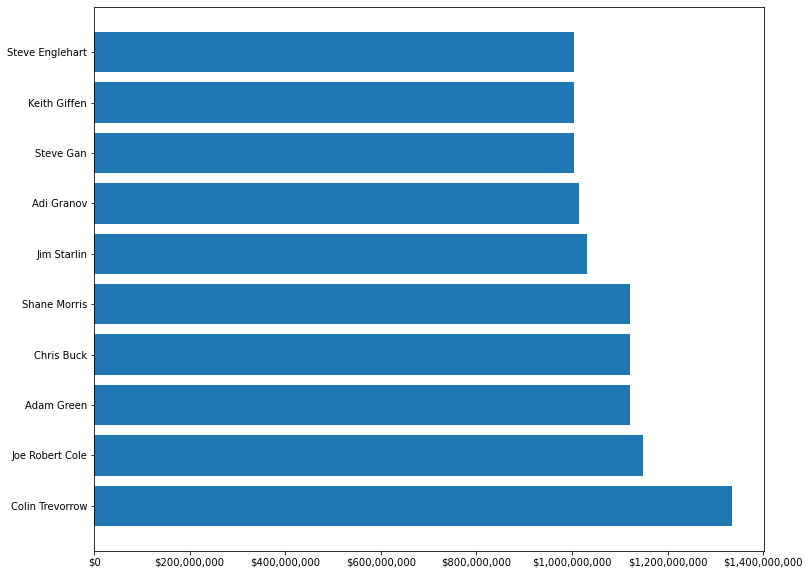

In [ ]:
fig, ax = plt.subplots(figsize=(12,10))

ax.barh(mean_writer_tograph.index, mean_writer_tograph['net_profit'])
ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

## DIRECTOR VS GROSS OR RATING

In [ ]:
q2 = """
SELECT DISTINCT *
FROM directors
;
"""
director_df = pd.read_sql(q2, conn)

In [ ]:
director_df = director_df.merge(
    person_df, 
    left_on='person_id',
    right_on = 'person_id',
    how = 'left')

In [ ]:
director_df

,movie_id,person_id,primary_name,death_year
0,tt0285252,nm0899854,Tony Vitale,NaN
1,tt0462036,nm1940585,Bill Haley,NaN
2,tt0835418,nm0151540,Jay Chandrasekhar,NaN
3,tt0878654,nm0089502,Albert Pyun,NaN
4,tt0878654,nm2291498,Joe Baile,NaN
...,...,...,...,...
163530,tt8999974,nm10122357,Daysi Burbano,NaN
163531,tt9001390,nm6711477,Bernard Lessa,NaN
163532,tt9001494,nm10123242,Tate Nova,NaN
163533,tt9001494,nm10123248,Courtney Faye Powell,NaN


In [ ]:
imdb_basics_merged_dir = director_df.merge(
    imdb_basics_merged,
    left_on = 'movie_id',
    right_on = 'movie_id',
    how = 'left')

In [ ]:
imdb_basics_merged_dir = imdb_basics_merged_dir[(imdb_basics_merged_dir['production_budget'].notnull() == True)]
#nulls dont have financial info

In [ ]:
imdb_basics_merged_dir

,movie_id,person_id,primary_name,death_year,primary_title,original_title,start_year,runtime_minutes,genres,region,types,title_merge,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross
8,tt0999913,nm0527109,Rod Lurie,NaN,Straw Dogs,Straw Dogs,2011.0,110.0,"Action,Drama,Thriller",US,imdbDisplay,strawdogs,5674.0,2011-09-16 00:00:00,Straw Dogs,25000000.0,10324441.0,11253821.0
49,tt1125929,nm0000431,Taylor Hackford,NaN,Love Ranch,Love Ranch,2010.0,117.0,"Biography,Comedy,Drama",US,None,loveranch,5705.0,2010-06-30 00:00:00,Love Ranch,25000000.0,137885.0,146149.0
50,tt1126618,nm0585011,Roger Michell,NaN,Morning Glory,Morning Glory,2010.0,107.0,"Comedy,Drama,Romance",US,None,morningglory,4859.0,2010-11-10 00:00:00,Morning Glory,40000000.0,31011732.0,59795070.0
52,tt1152830,nm1864022,Chris Tyrrell,NaN,The Joneses,The Joneses,2011.0,117.0,"Comedy,Drama",US,None,thejoneses,7074.0,2010-04-16 00:00:00,The Joneses,10000000.0,1475746.0,3541565.0
64,tt1336608,nm0788202,Adam Shankman,NaN,Rock of Ages,Rock of Ages,2012.0,123.0,"Comedy,Drama,Musical",US,None,rockofages,4115.0,2012-06-15 00:00:00,Rock of Ages,70000000.0,38518613.0,61031932.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163618,tt7368554,nm0838499,Martin Sulík,NaN,The Interpreter,The Interpreter,2018.0,113.0,"Comedy,Drama",US,imdbDisplay,theinterpreter,3849.0,2005-04-22 00:00:00,The Interpreter,90000000.0,72708161.0,162753837.0
163747,tt7594192,nm9267400,Jehan Semper,NaN,Beautiful,Beautiful,2019.0,NaN,Drama,US,None,beautiful,7187.0,2000-09-29 00:00:00,Beautiful,9000000.0,3134509.0,3134509.0
163764,tt7634968,nm0788202,Adam Shankman,NaN,What Men Want,What Men Want,2019.0,117.0,"Comedy,Fantasy,Romance",US,None,whatmenwant,5907.0,2019-02-08 00:00:00,What Men Want,20000000.0,54611903.0,69911903.0
163765,tt7634968,nm0788202,Adam Shankman,NaN,What Men Want,What Men Want,2019.0,117.0,"Comedy,Fantasy,Romance",US,imdbDisplay,whatmenwant,5907.0,2019-02-08 00:00:00,What Men Want,20000000.0,54611903.0,69911903.0


In [ ]:
#creating net profit
imdb_basics_merged_dir['net_profit'] = imdb_basics_merged_dir['worldwide_gross'] - imdb_basics_merged_dir['production_budget']

In [ ]:
#getting mean of dir
mean_dir_profit = imdb_basics_merged_dir.groupby('primary_name').mean().sort_values(by = 'net_profit', ascending = False)

In [ ]:
#dont want the dead
mean_dir_profit = mean_dir_profit[mean_dir_profit['death_year'].isnull()]

In [ ]:
mean_dir_profit.drop('Adam Green', axis = 0, inplace = True)
#false data, frozen got merged into him on accident.

In [ ]:
#what to graph
mean_dir_tograph = mean_dir_profit.head(10)

In [ ]:
#maybe?
mean_dir_tograph['net_profit']

primary_name
Chris Buck         1.122470e+09
Jennifer Lee       1.122470e+09
Kyle Balda         1.023032e+09
Eric Guillon       9.597278e+08
Colin Trevorrow    9.571273e+08
Joe Russo          9.234154e+08
Anthony Russo      9.234154e+08
Jared Bush         8.694296e+08
Pierre Coffin      8.549363e+08
Angus MacLane      8.212152e+08
Name: net_profit, dtype: float64

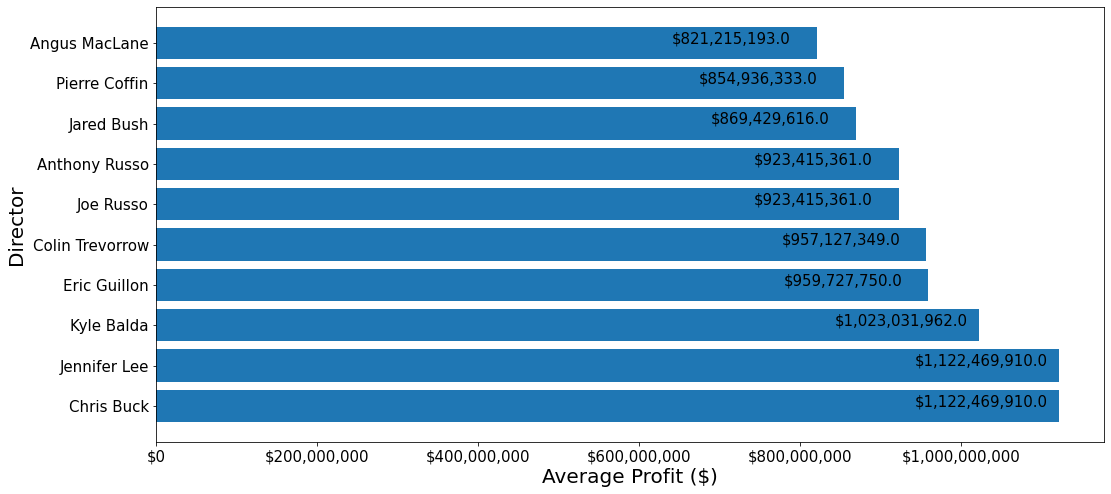

In [ ]:
fig, ax = plt.subplots(figsize=(17,8))

director_ = mean_dir_tograph['net_profit']

ax.barh(director_.index, director_)
ax.xaxis.set_major_formatter(StrMethodFormatter('${x:,.0f}'))

#ax.set_title('Director vs Average Profit', size = 20)
ax.set_xlabel('Average Profit ($)', size = 20)
ax.set_ylabel('Director', size = 20)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

for director in director_.index:
    ax.annotate(f"${format(round(director_[director], 0), ',')}", xy = (director_[director] - 180000000, director), size = 15)
    
plt.savefig('director_profit.jpg')

## MOVIE RATING (R, M, PG, PG13) VS APPROVAL RATING

In [18]:
# import the clean data
rt = pd.read_csv("../data/rt_cleaned_combined.csv")

In [19]:
# group films by ratings
ratings = rt.groupby('rated',as_index=False)['new_rating'].mean()
ratings

,rated,new_rating
0,G,0.660845
1,NR,0.672566
2,PG,0.591437
3,PG-13,0.564879
4,R,0.600617


''

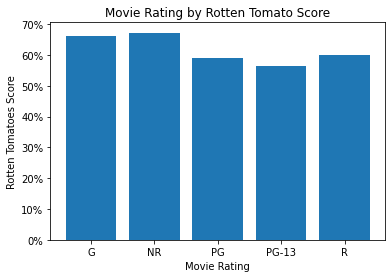

In [20]:
# visualize

fig, ax = plt.subplots()

ax.bar(x=ratings['rated'], height = ratings['new_rating']*100)
ax.set_ylabel('Rotten Tomatoes Score')
ax.set_xlabel('Movie Rating')
ax.set_title("Movie Rating by Rotten Tomato Score")
ax.yaxis.set_major_formatter(tkr.StrMethodFormatter('{x:,.0f}%'))
;

## RUNTIME VS GROSS

### Import the Data

In [21]:
# import the clean data

imdb_gross = pd.read_csv('../data/df_imdb_w_fin.csv')
imdb_gross.head()

,Unnamed: 0,movie_id,primary_title,start_year,runtime_minutes,genres,title_merge_x,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_merge_y
0,0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama",sunghursh,NaN,NaN,NaN,NaN,NaN,NaN
1,1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama",onedaybeforetherainyseason,NaN,NaN,NaN,NaN,NaN,NaN
2,2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,theothersideofthewind,NaN,NaN,NaN,NaN,NaN,NaN
3,3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",sabsebadasukh,NaN,NaN,NaN,NaN,NaN,NaN
4,4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",thewanderingsoapopera,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
# Filter for runtime, and worldwide gross

gross_runtime = imdb_gross.loc[(imdb_gross['domestic_gross'] > 0) & (imdb_gross['runtime_minutes'] > 40), ['primary_title', 'runtime_minutes', 'worldwide_gross']]

In [77]:
# Find the averages for each

avg_runtime = gross_runtime.runtime_minutes.mean()
print(avg_runtime)

avg_gross = gross_runtime.worldwide_gross.mean()
print(avg_gross)

103.85198983911938
93506014.34257409


### Binning Runtime

Half of Hollywood's movies are between 96-120 minutes long according to [this article](https://stephenfollows.com/are-hollywood-movies-getting-longer/#:~:text=Length%20of%20Hollywood%20movies&text=Half%20of%20all%20Hollywood%20movies,shortest%20are%20animations%20and%20documentaries.) on stephenfollows.com

So let's split the runtime into 3 categories:
* less than 96 minutes
* between 96 and 120 minutes
* greater than 120 minutes

In [78]:
bins = [0, 96, 120, 240]
labels = ['< 96', '96-120', '> 120']
gross_runtime['runtime_bin'] = pd.cut(gross_runtime['runtime_minutes'], bins=bins, labels=labels, include_lowest=True)

In [79]:
# group by runtime bin

binned_run = gross_runtime.groupby('runtime_bin', as_index=False)['worldwide_gross'].mean().sort_values('worldwide_gross', ascending=False)
binned_run

,runtime_bin,worldwide_gross
2,> 120,1.666814e+08
1,96-120,8.457848e+07
0,< 96,6.799348e+07


### Visualizations

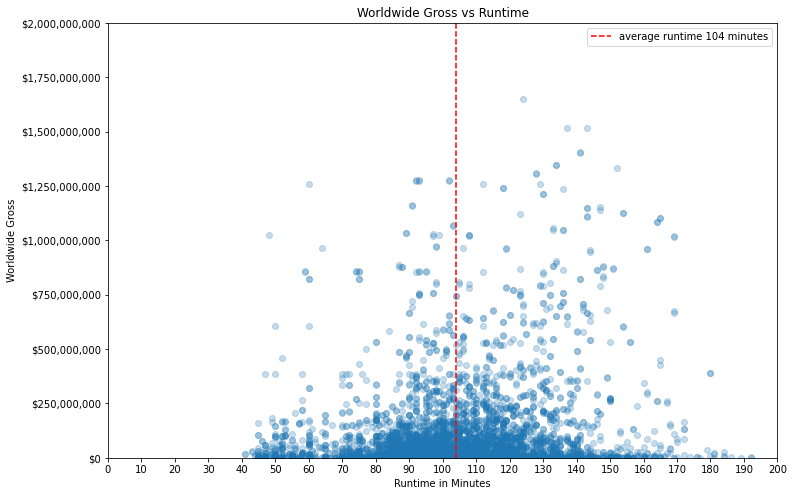

''

In [80]:
fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(x=gross_runtime.runtime_minutes, y=gross_runtime.worldwide_gross, alpha = .25)
ax.axvline(x = avg_runtime, color = 'r', linestyle = '--', label = 'average runtime 104 minutes')
#ax.axhline(y = avg_gross, color = 'y', linestyle = '-.', label = 'average gross $93,559,148')
ax.set_title("Worldwide Gross vs Runtime")
ax.set_xlabel('Runtime in Minutes')
ax.set_ylabel('Worldwide Gross')
ax.set_xlim(0,200)
ax.set_ylim(0,2000000000)
ax.set_xticks(np.arange(0, 210, 10))
ax.yaxis.set_major_formatter(tkr.StrMethodFormatter('${x:,.0f}'))
ax.legend()
ax.dpi = 800
plt.show()
;


''

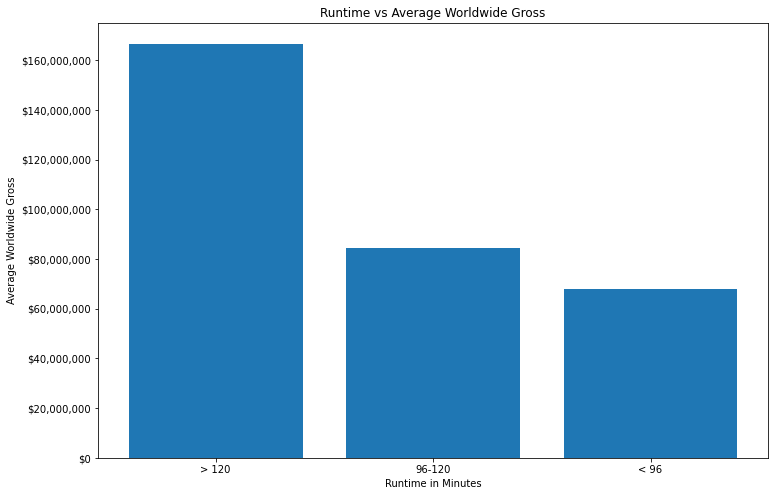

In [102]:
fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(x=binned_run.runtime_bin, height=binned_run.worldwide_gross)
ax.yaxis.set_major_formatter(tkr.StrMethodFormatter('${x:,.0f}'))
ax.set_xlabel('Runtime in Minutes')
ax.set_ylabel('Average Worldwide Gross')
ax.set_title('Runtime vs Average Worldwide Gross')
;

## RUNTIME VS BUDGET

### Data at first glance

In [103]:
# filter for the needed data: runtime and production budget

bud_runtime = imdb_gross.loc[(imdb_gross['production_budget'] > 0) & (imdb_gross['runtime_minutes'] > 40), ['primary_title', 'runtime_minutes', 'production_budget']]
bud_runtime

,primary_title,runtime_minutes,production_budget
20,Foodfight!,91.0,45000000.0
40,The Overnight,88.0,200000.0
49,On the Road,124.0,25000000.0
56,The Secret Life of Walter Mitty,114.0,91000000.0
61,A Walk Among the Tombstones,114.0,28000000.0
...,...,...,...
147286,The First Time,90.0,2000000.0
147382,Ray,111.0,40000000.0
147521,Ali,110.0,109000000.0
147809,Columbus,85.0,700000.0


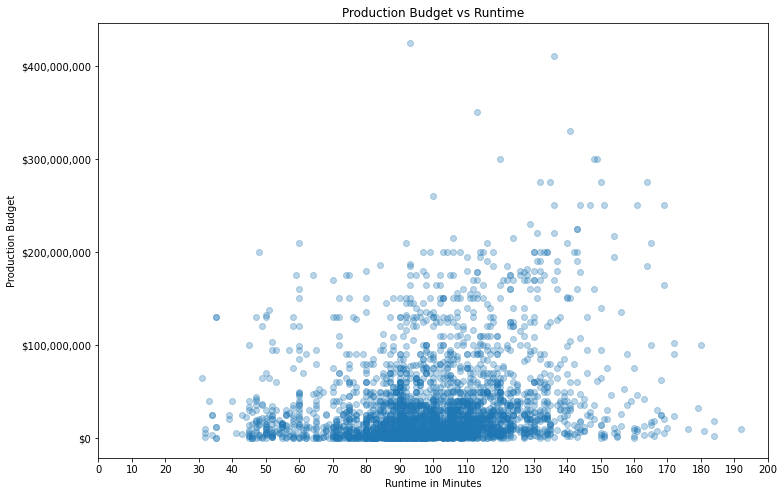

''

In [26]:
# quick plot

fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(x=bud_runtime.runtime_minutes, y=bud_runtime.production_budget, alpha = .3)
ax.set_title("Production Budget vs Runtime")
ax.set_xlabel('Runtime in Minutes')
ax.set_ylabel('Production Budget')
ax.set_xlim(0,200)
# ax.set_ylim(0,2000000000)
ax.set_xticks(np.arange(0, 210, 10))
ax.yaxis.set_major_formatter(tkr.StrMethodFormatter('${x:,.0f}'))

plt.show()
;

### Bin the Runtime

In [105]:
bins = [0, 96, 120, 240]
labels = ['< 96', '96-120', '> 120']
bud_runtime['runtime_bin'] = pd.cut(bud_runtime['runtime_minutes'], bins=bins, labels=labels, include_lowest=True)

In [107]:
# group by runtime bin

prod_bin_run = bud_runtime.groupby('runtime_bin', as_index=False)['production_budget'].mean().sort_values('production_budget', ascending=False)
prod_bin_run

,runtime_bin,production_budget
2,> 120,6.042079e+07
1,96-120,3.410414e+07
0,< 96,2.408749e+07


''

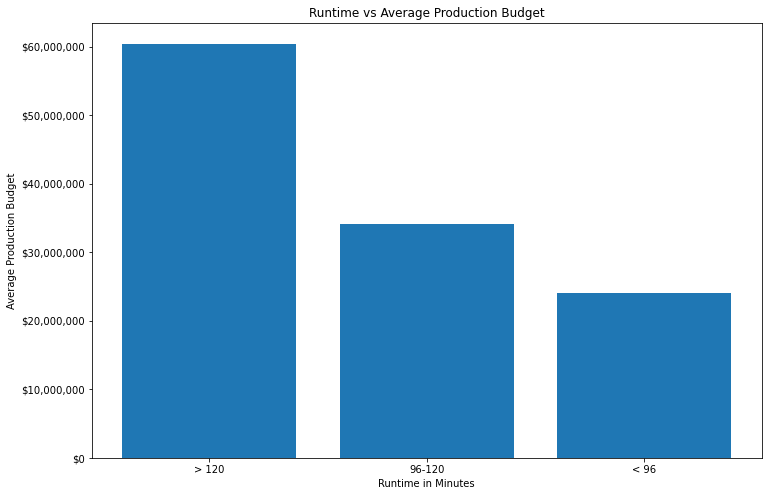

In [109]:
# visualization

fig, ax = plt.subplots(figsize=(12, 8))

ax.bar(x=prod_bin_run.runtime_bin, height=prod_bin_run.production_budget)
ax.yaxis.set_major_formatter(tkr.StrMethodFormatter('${x:,.0f}'))
ax.set_xlabel('Runtime in Minutes')
ax.set_ylabel('Average Production Budget')
ax.set_title('Runtime vs Average Production Budget')
;

It looks like the higher the average production budget, the higher the runtime.

## APPROVAL RATING VS GROSS	

### Import the data

In [111]:
imdb_ratings = pd.read_sql('''
SELECT DISTINCT(b.primary_title), r.averagerating
FROM movie_basics b
    JOIN movie_ratings r
    ON b.movie_id = r.movie_id
WHERE r.numvotes > 100    
;'''
, conn)

In [112]:
# join imbd_gross with other dataset imdb_ratings

gross_ratings = imdb_gross.merge(imdb_ratings,
                how = 'inner',
                on = 'primary_title')

In [113]:
# sanity check

gross_ratings.head()

,Unnamed: 0,movie_id,primary_title,start_year,runtime_minutes,genres,title_merge_x,release_date,movie,production_budget,domestic_gross,worldwide_gross,title_merge_y,averagerating
0,2,tt0069049,The Other Side of the Wind,2018,122.0,Drama,theothersideofthewind,NaN,NaN,NaN,NaN,NaN,NaN,6.9
1,4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy",thewanderingsoapopera,NaN,NaN,NaN,NaN,NaN,NaN,6.5
2,7,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",joefindsgrace,NaN,NaN,NaN,NaN,NaN,NaN,8.1
3,10,tt0146592,Pál Adrienn,2010,136.0,Drama,páladrienn,NaN,NaN,NaN,NaN,NaN,NaN,6.8
4,13,tt0162942,Children of the Green Dragon,2010,89.0,Drama,childrenofthegreendragon,NaN,NaN,NaN,NaN,NaN,NaN,6.9


In [116]:
# filter for relevant data: average ratings and worldwide gross

gr_filtered = gross_ratings.loc[ (gross_ratings['averagerating'] > 0) & (gross_ratings['worldwide_gross'] > 0), ['primary_title', 'averagerating', 'worldwide_gross']]

### Visualization

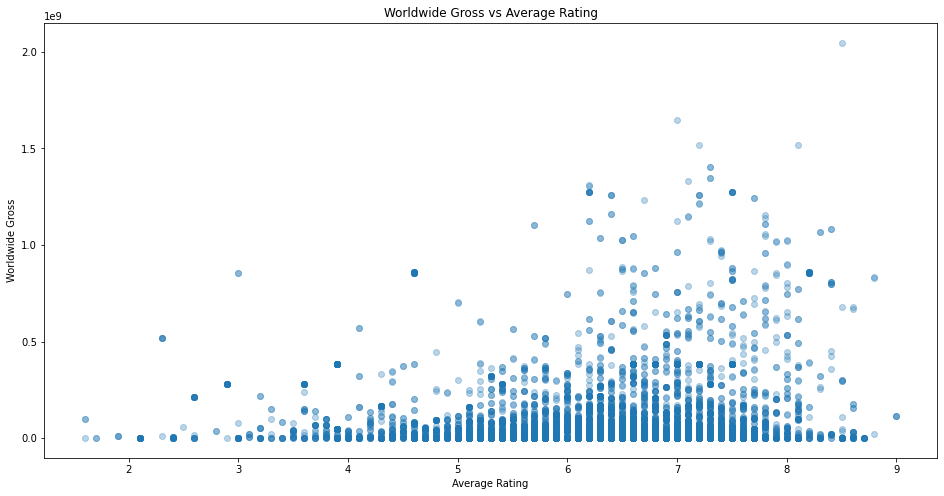

''

In [31]:
fig, ax = plt.subplots(figsize=(16,8))

ax.scatter(x=gr_filtered.averagerating, y=gr_filtered.worldwide_gross, alpha = .3)
ax.set_title("Worldwide Gross vs Average Rating")
ax.set_xlabel('Average Rating')
ax.set_ylabel('Worldwide Gross')


plt.show()
;